In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
df=pd.read_csv('/content/heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


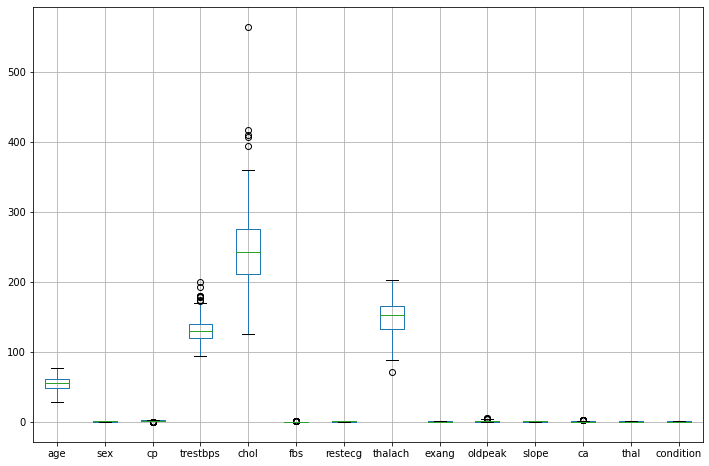

In [30]:
plt.figure(figsize=(12,8))
df.boxplot()

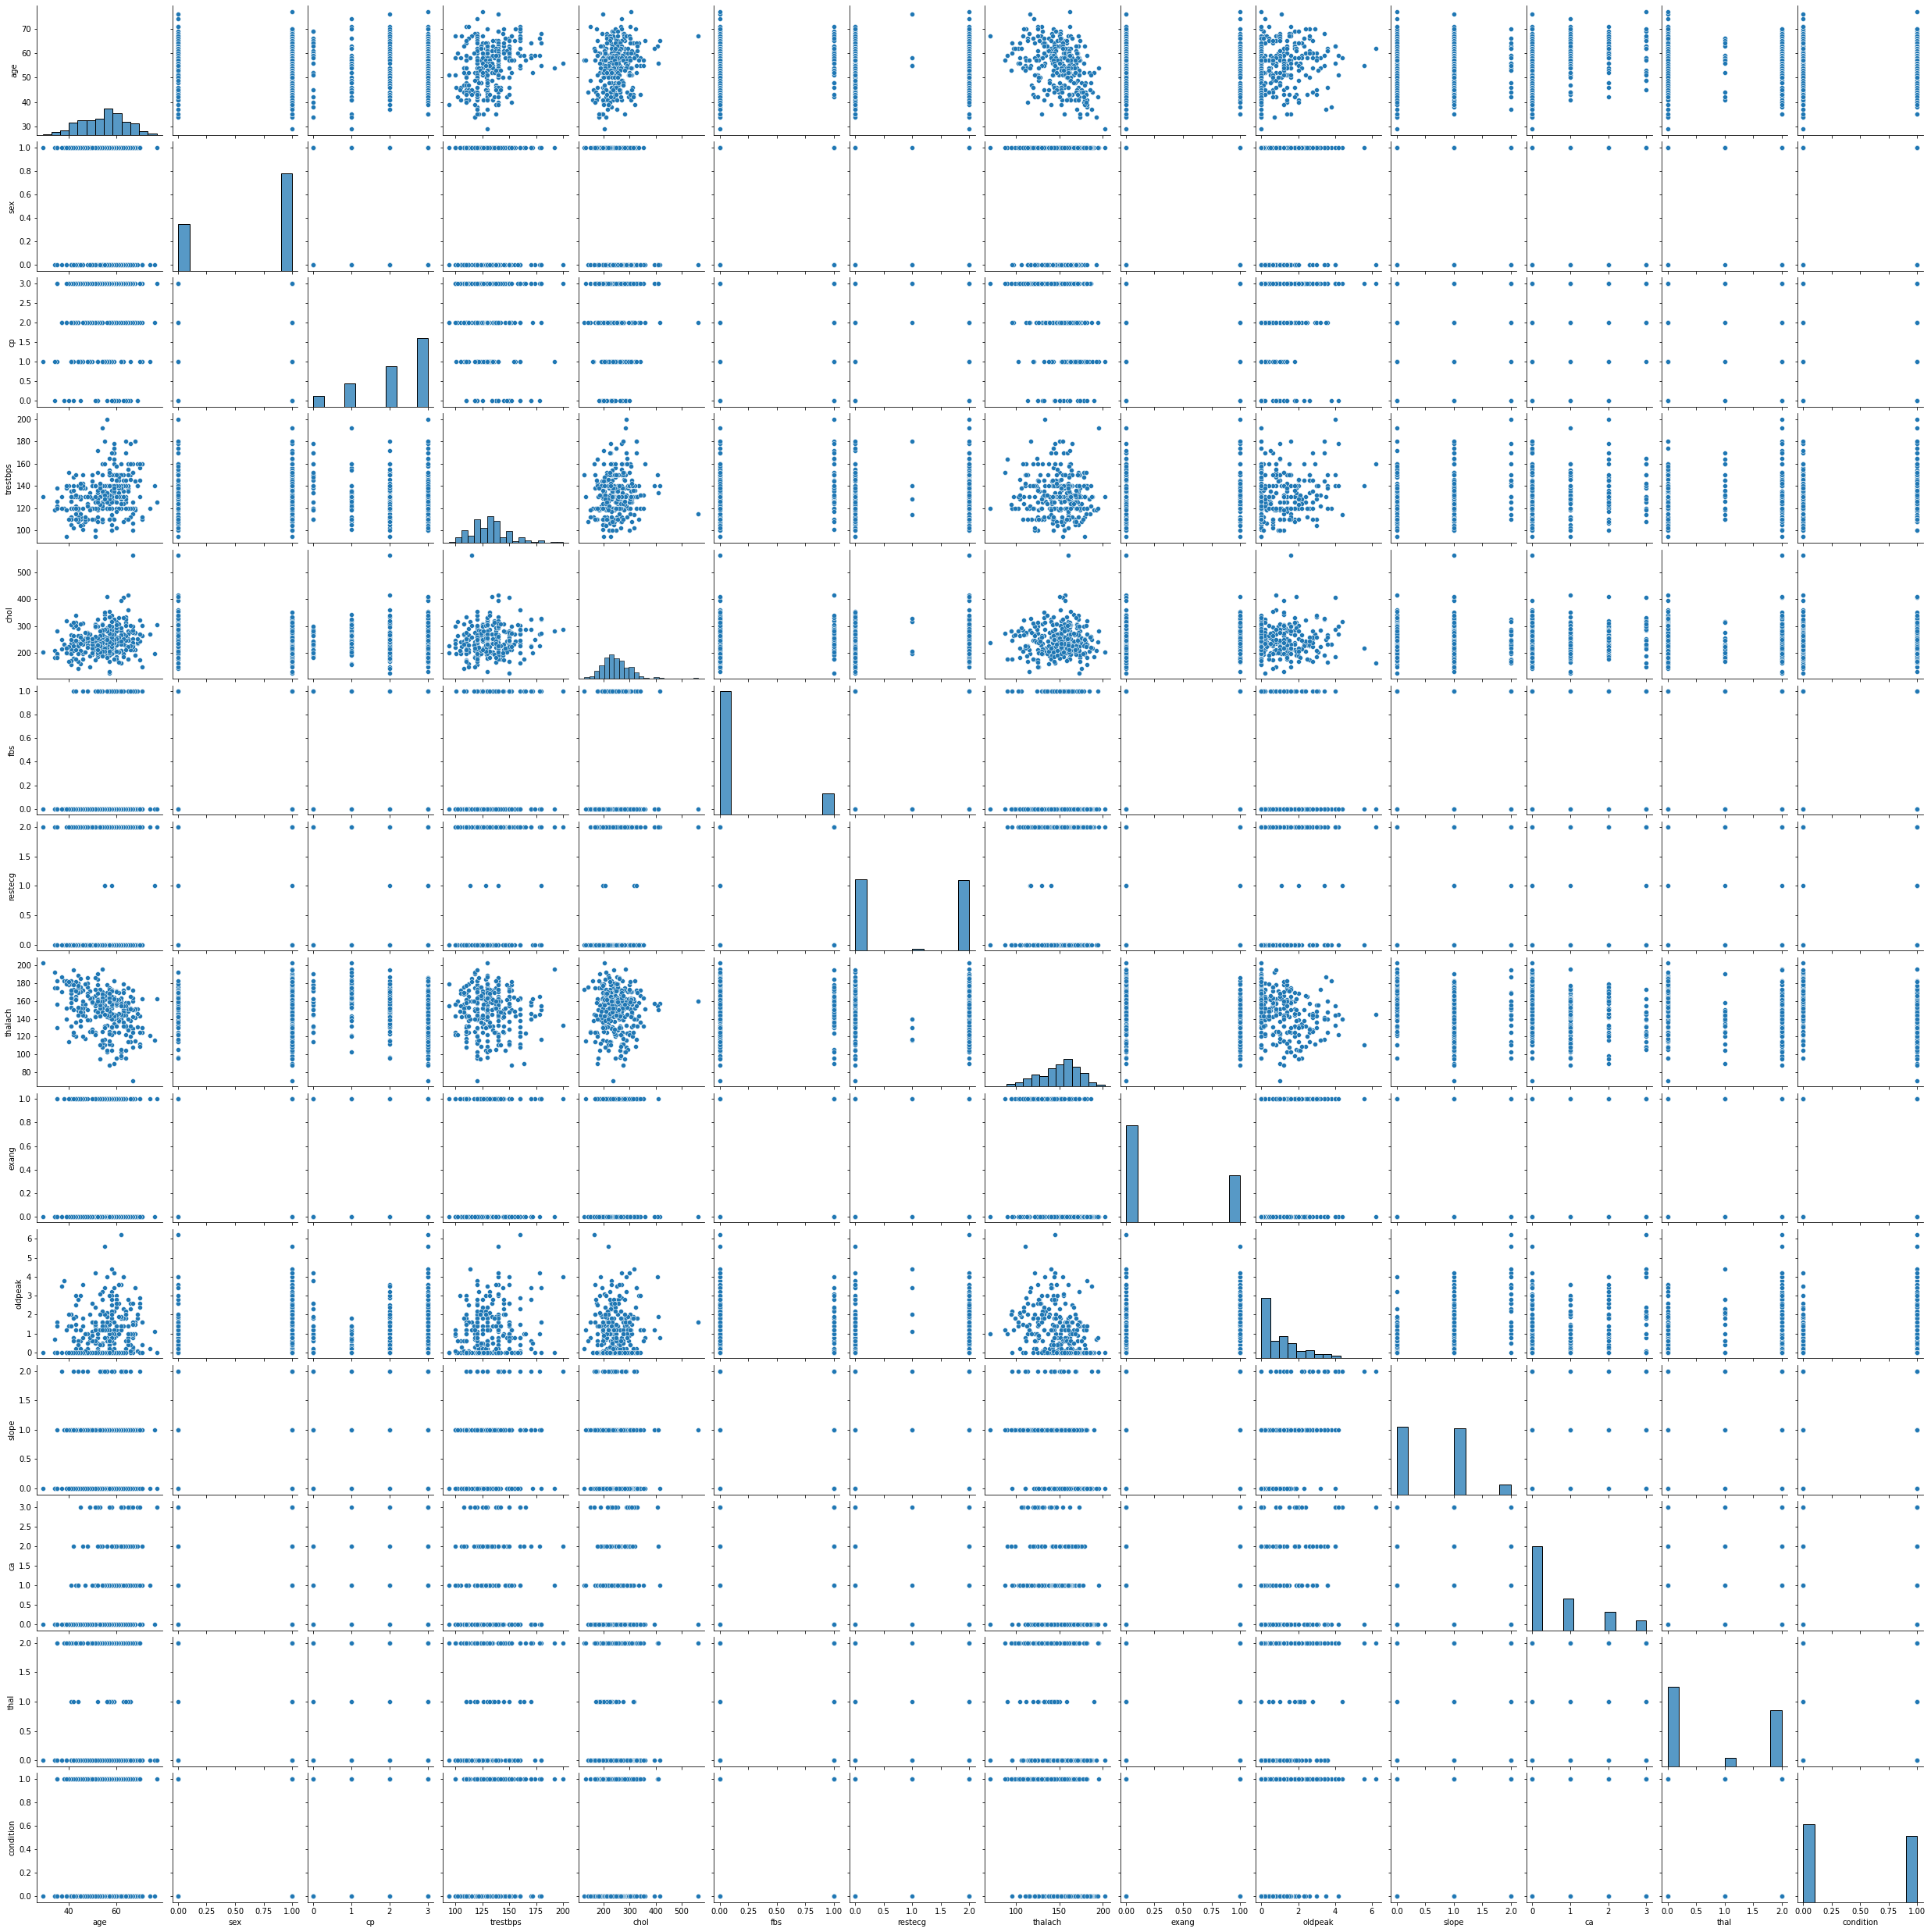

In [5]:
sns.pairplot(data = df)


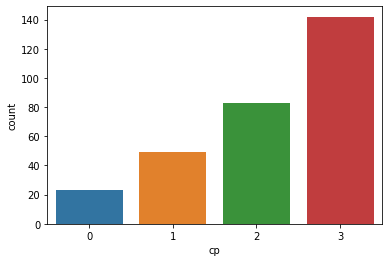

In [20]:
sns.countplot(x='cp',data=df)

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X = df.drop(["cp"], axis = 1)
y = df["cp"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


**Model Building**

In [11]:
from sklearn.svm import SVC

In [12]:
model = SVC()


In [13]:
model.fit(X_train, y_train)


SVC()

In [14]:
predictions = model.predict(X_test)


In [16]:
from sklearn.metrics import classification_report, confusion_matrix


In [18]:
print(confusion_matrix(y_test, predictions))


[[ 0  0  0  8]
 [ 0  0  0 14]
 [ 0  0  0 19]
 [ 0  0  0 49]]


In [21]:
from sklearn.model_selection import GridSearchCV


In [22]:
param_grid = {"C": [0.1,1,10,100,1000, 10000, 100000], "gamma" : [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]}


In [23]:
grid = GridSearchCV(SVC(), param_grid, verbose = 8)


In [24]:
grid.fit(X_train, y_train)


Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.452 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.452 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.463 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.439 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.439 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.452 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.452 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.463 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.439 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.439 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.452 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]},
             verbose=8)

**Model Testing**

In [25]:
grid_predictions = grid.predict(X_test)


In [26]:
print(confusion_matrix(y_test, grid_predictions))


[[ 1  1  3  3]
 [ 0  2 10  2]
 [ 0  4  9  6]
 [ 1  3 10 35]]


In [27]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.20      0.14      0.17        14
           2       0.28      0.47      0.35        19
           3       0.76      0.71      0.74        49

    accuracy                           0.52        90
   macro avg       0.44      0.36      0.36        90
weighted avg       0.55      0.52      0.52        90

